In [13]:
import dataframeWithMetadata as dfmd
import dataAgglomeration as da
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rcParams
rcParams["figure.dpi"] = 400

In [64]:
agglomerator = da.data_agglomerator("temporalAccuracy.parameter","bubblepproc.dat", 
                                     directory_pattern="BDFNew-temporalAccuracy_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("BDFNew-temporalAccuracy.csv")
dframe_BDFNew = agglomerator.study_dataframe()
dframe_BDFNew = dframe_BDFNew.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.001], [0], [0], [0], [0], [2], [5], [1e-07], [1e-08], [0], [0.001], [1e-06, 5e-06, 1e-05, 5e-05, 0.0001], [0.02], [20], [-9.80665], [0.0], [0], [1.2], [0], [1200000.0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'purge_write', 'write_interval', 'delta_t', 'end_time', 'n_base', 'gravity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


In [8]:
dframe_BDFNew_normal = dframe_BDFNew.loc[(dframe_BDFNew.index.get_level_values('delta_t') < 1e-4)]

In [55]:
deltaT= dframe_BDFNew_normal.index.get_level_values("delta_t").unique()
g=-9.80665
RSM=[]
RSM1=[]
SpheBDF=[]

for T in deltaT:
    RSM.append(np.sqrt(((dframe_BDFNew_normal.loc[T]["z-Velocity"] - g*dframe_BDFNew_normal.loc[T]["time"]) ** 2).mean()))
    RSM1.append(np.sqrt(((dframe_BDFNew_normal.loc[T]["bubbleCenterz"] - 0.5*g*(dframe_BDFNew_normal.loc[T]["time"])**2) ** 2).mean()))
    SpheBDF.append(np.sqrt(((dframe_BDFNew_normal.loc[T]["sphericity"]-dframe_BDFNew_normal.loc[T]["sphericity"].iloc[0])**2).mean()))

In [63]:
RSM

[1.2857127223767273e-05,
 1.1114642973200307e-05,
 1.0240773403692843e-05,
 4.275725767836942e-05]

In [65]:
RSM1

[5.086357303739096e-07,
 9.403817754400624e-07,
 1.2063696295477674e-06,
 2.1954267143488513e-06]

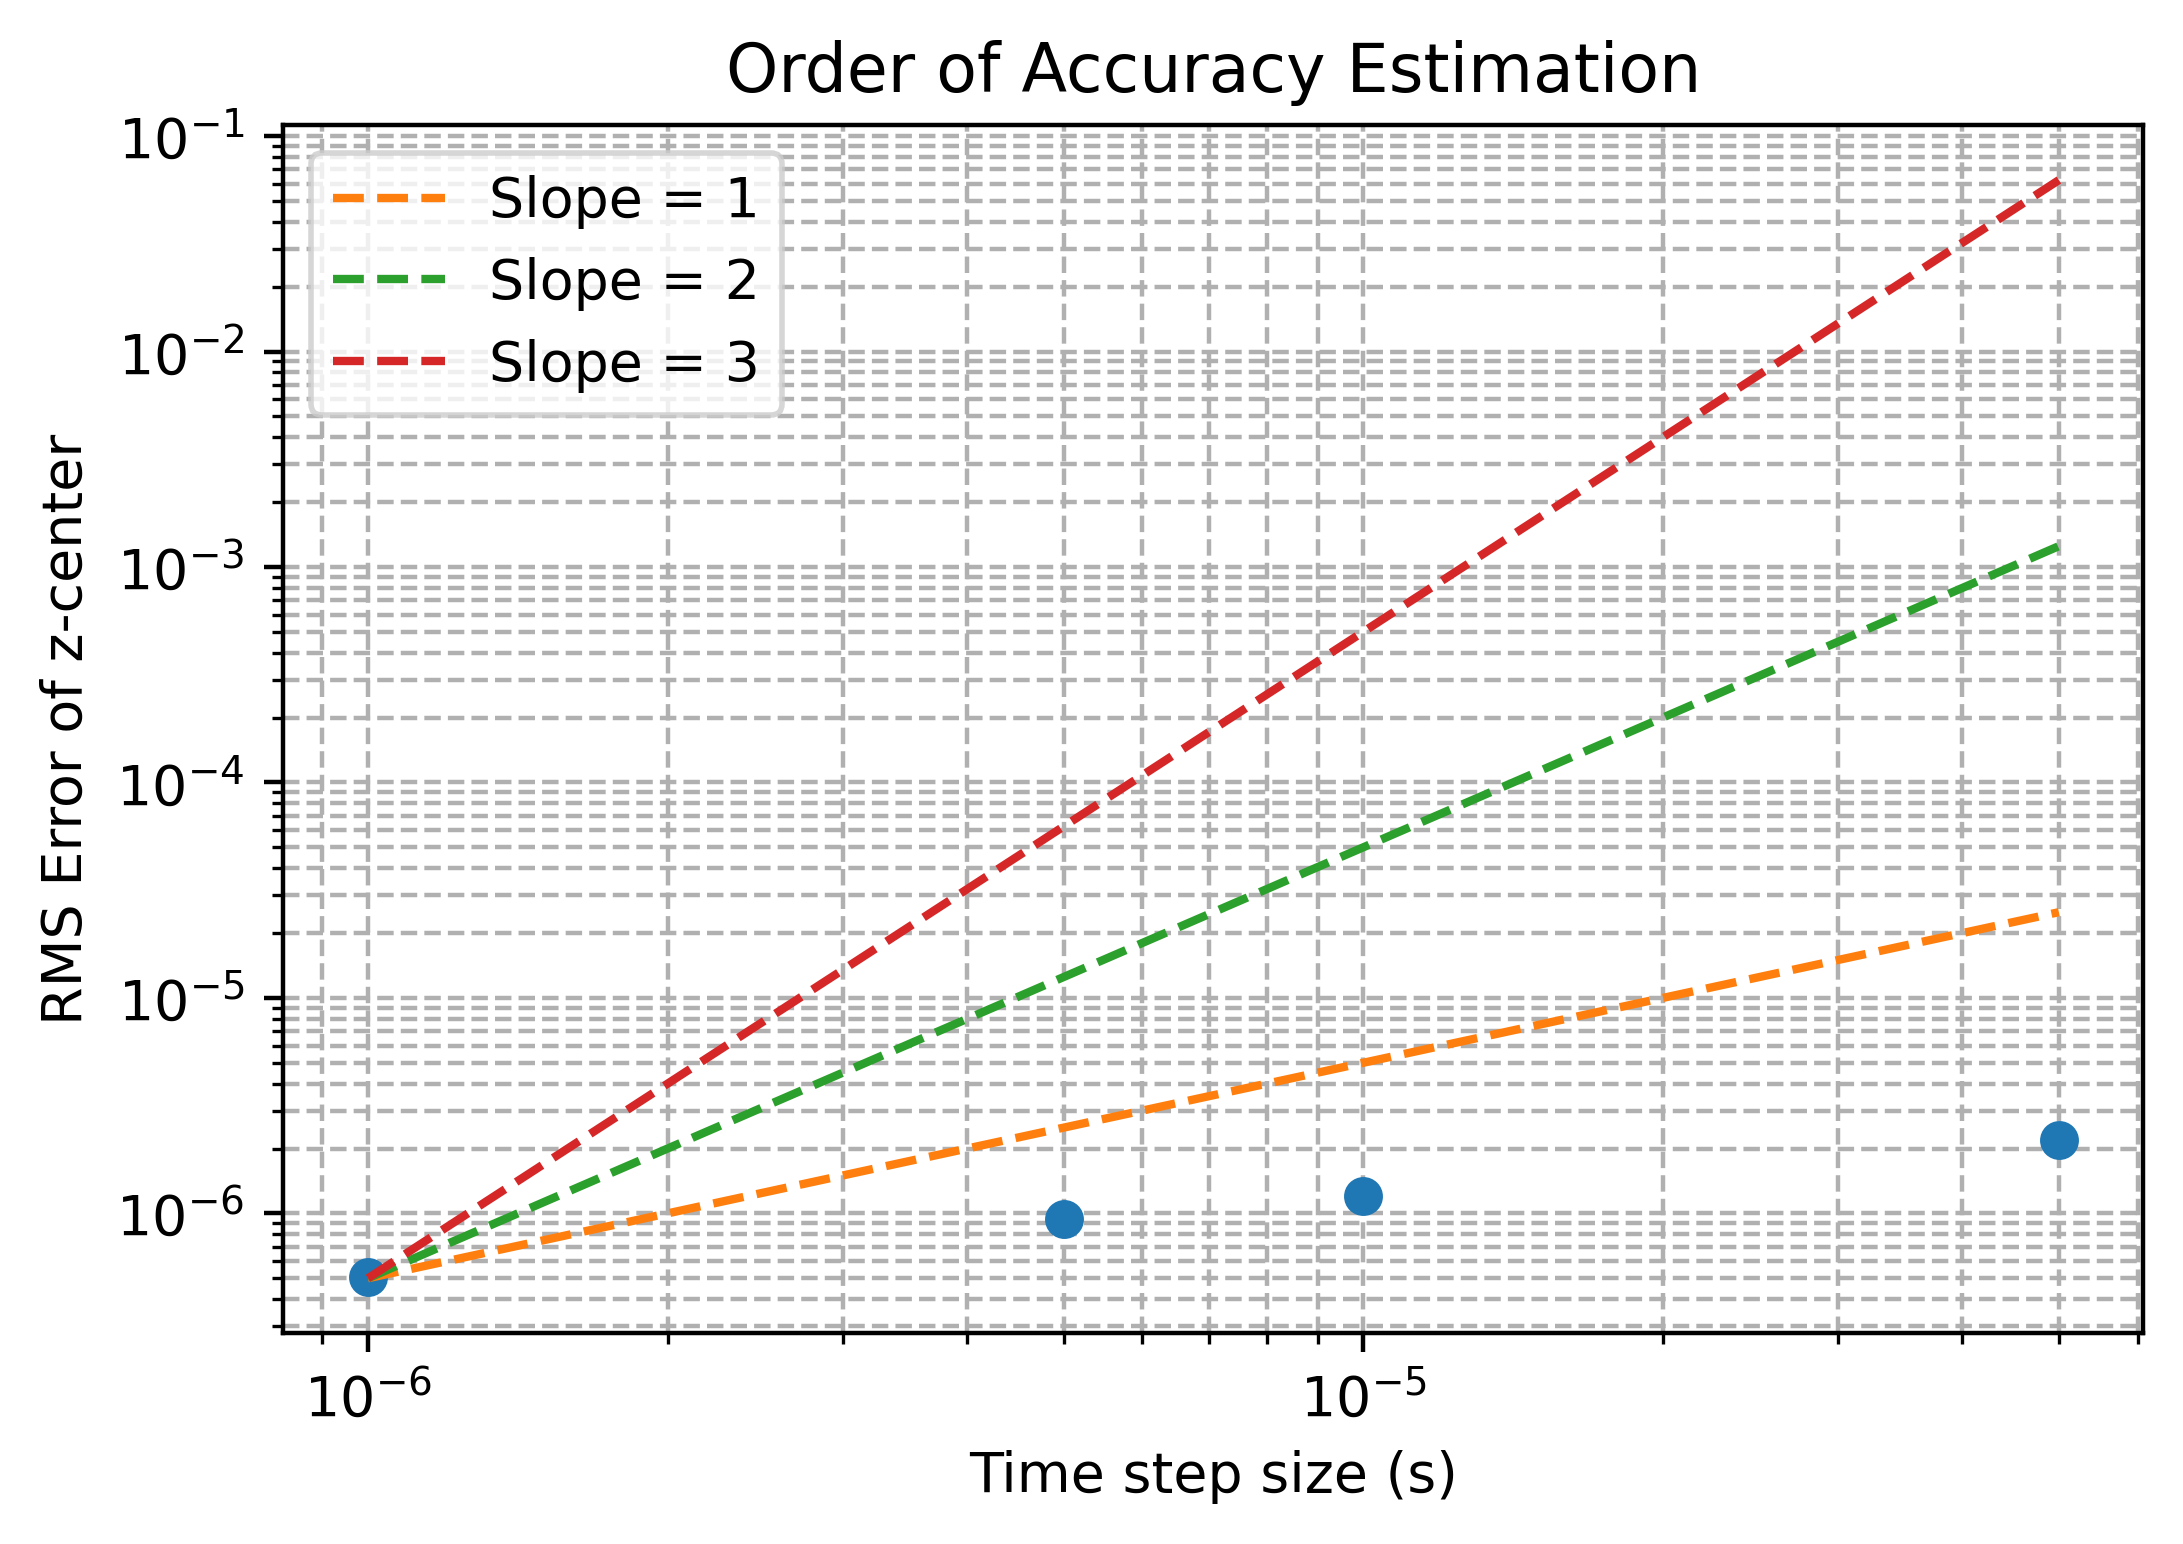

In [39]:
# Take logs
log_input = np.log10(RSM1)
log_error = np.log10(deltaT)

# Linear fit in log-log space
fitted_line1 = deltaT*0.5
fitted_line2 = np.power(deltaT,2)*5e5
fitted_line3 = np.power(deltaT,3)*5e11


# Plotting
plt.figure()
plt.loglog(deltaT, RSM1, 'o')
plt.loglog(deltaT, fitted_line1, '--', label=f'Slope = 1')
plt.loglog(deltaT, fitted_line2, '--', label=f'Slope = 2')
plt.loglog(deltaT, fitted_line3, '--', label=f'Slope = 3')
plt.xlabel("Time step size (s)")
plt.ylabel("RMS Error of z-center")
plt.title("Order of Accuracy Estimation")
plt.grid(True, which="both", ls='--')
plt.legend()
plt.show()

In [35]:
RSM1

[5.086357303739096e-07,
 9.403817754400624e-07,
 1.2063696295477674e-06,
 2.1954267143488513e-06]

In [42]:
agglomerator = da.data_agglomerator("temporalAccuracy.parameter","bubblepproc.dat", 
                                     directory_pattern="Euler-temporalAccuracy_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("Euler-temporalAccuracy.csv")
dframe_Euler = agglomerator.study_dataframe()
dframe_Euler = dframe_Euler.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.001], [0], [0], [0], [0], [2], [5], [1e-07], [1e-08], [0], [0.001], [1e-06, 5e-06, 1e-05, 5e-05, 0.0001], [0.02], [20], [-9.80665], [0.0], [0], [1.2], [0], [1200000.0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'purge_write', 'write_interval', 'delta_t', 'end_time', 'n_base', 'gravity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


In [56]:
dframe_Euler_normal = dframe_Euler.loc[(dframe_Euler.index.get_level_values('delta_t') < 5e-5)]
deltaT1= dframe_Euler_normal.index.get_level_values("delta_t").unique()
g=-9.80665
RSM2=[]
RSM3=[]
SpheEuler=[]

for T in deltaT1:
    RSM2.append(np.sqrt(((dframe_Euler_normal.loc[T]["z-Velocity"] - g*dframe_Euler_normal.loc[T]["time"]) ** 2).mean()))
    RSM3.append(np.sqrt(((dframe_Euler_normal.loc[T]["bubbleCenterz"] - 0.5*g*(dframe_Euler_normal.loc[T]["time"])**2) ** 2).mean()))
    SpheEuler.append(np.sqrt(((dframe_Euler_normal.loc[T]["sphericity"]-dframe_Euler_normal.loc[T]["sphericity"].iloc[0])**2).mean()))

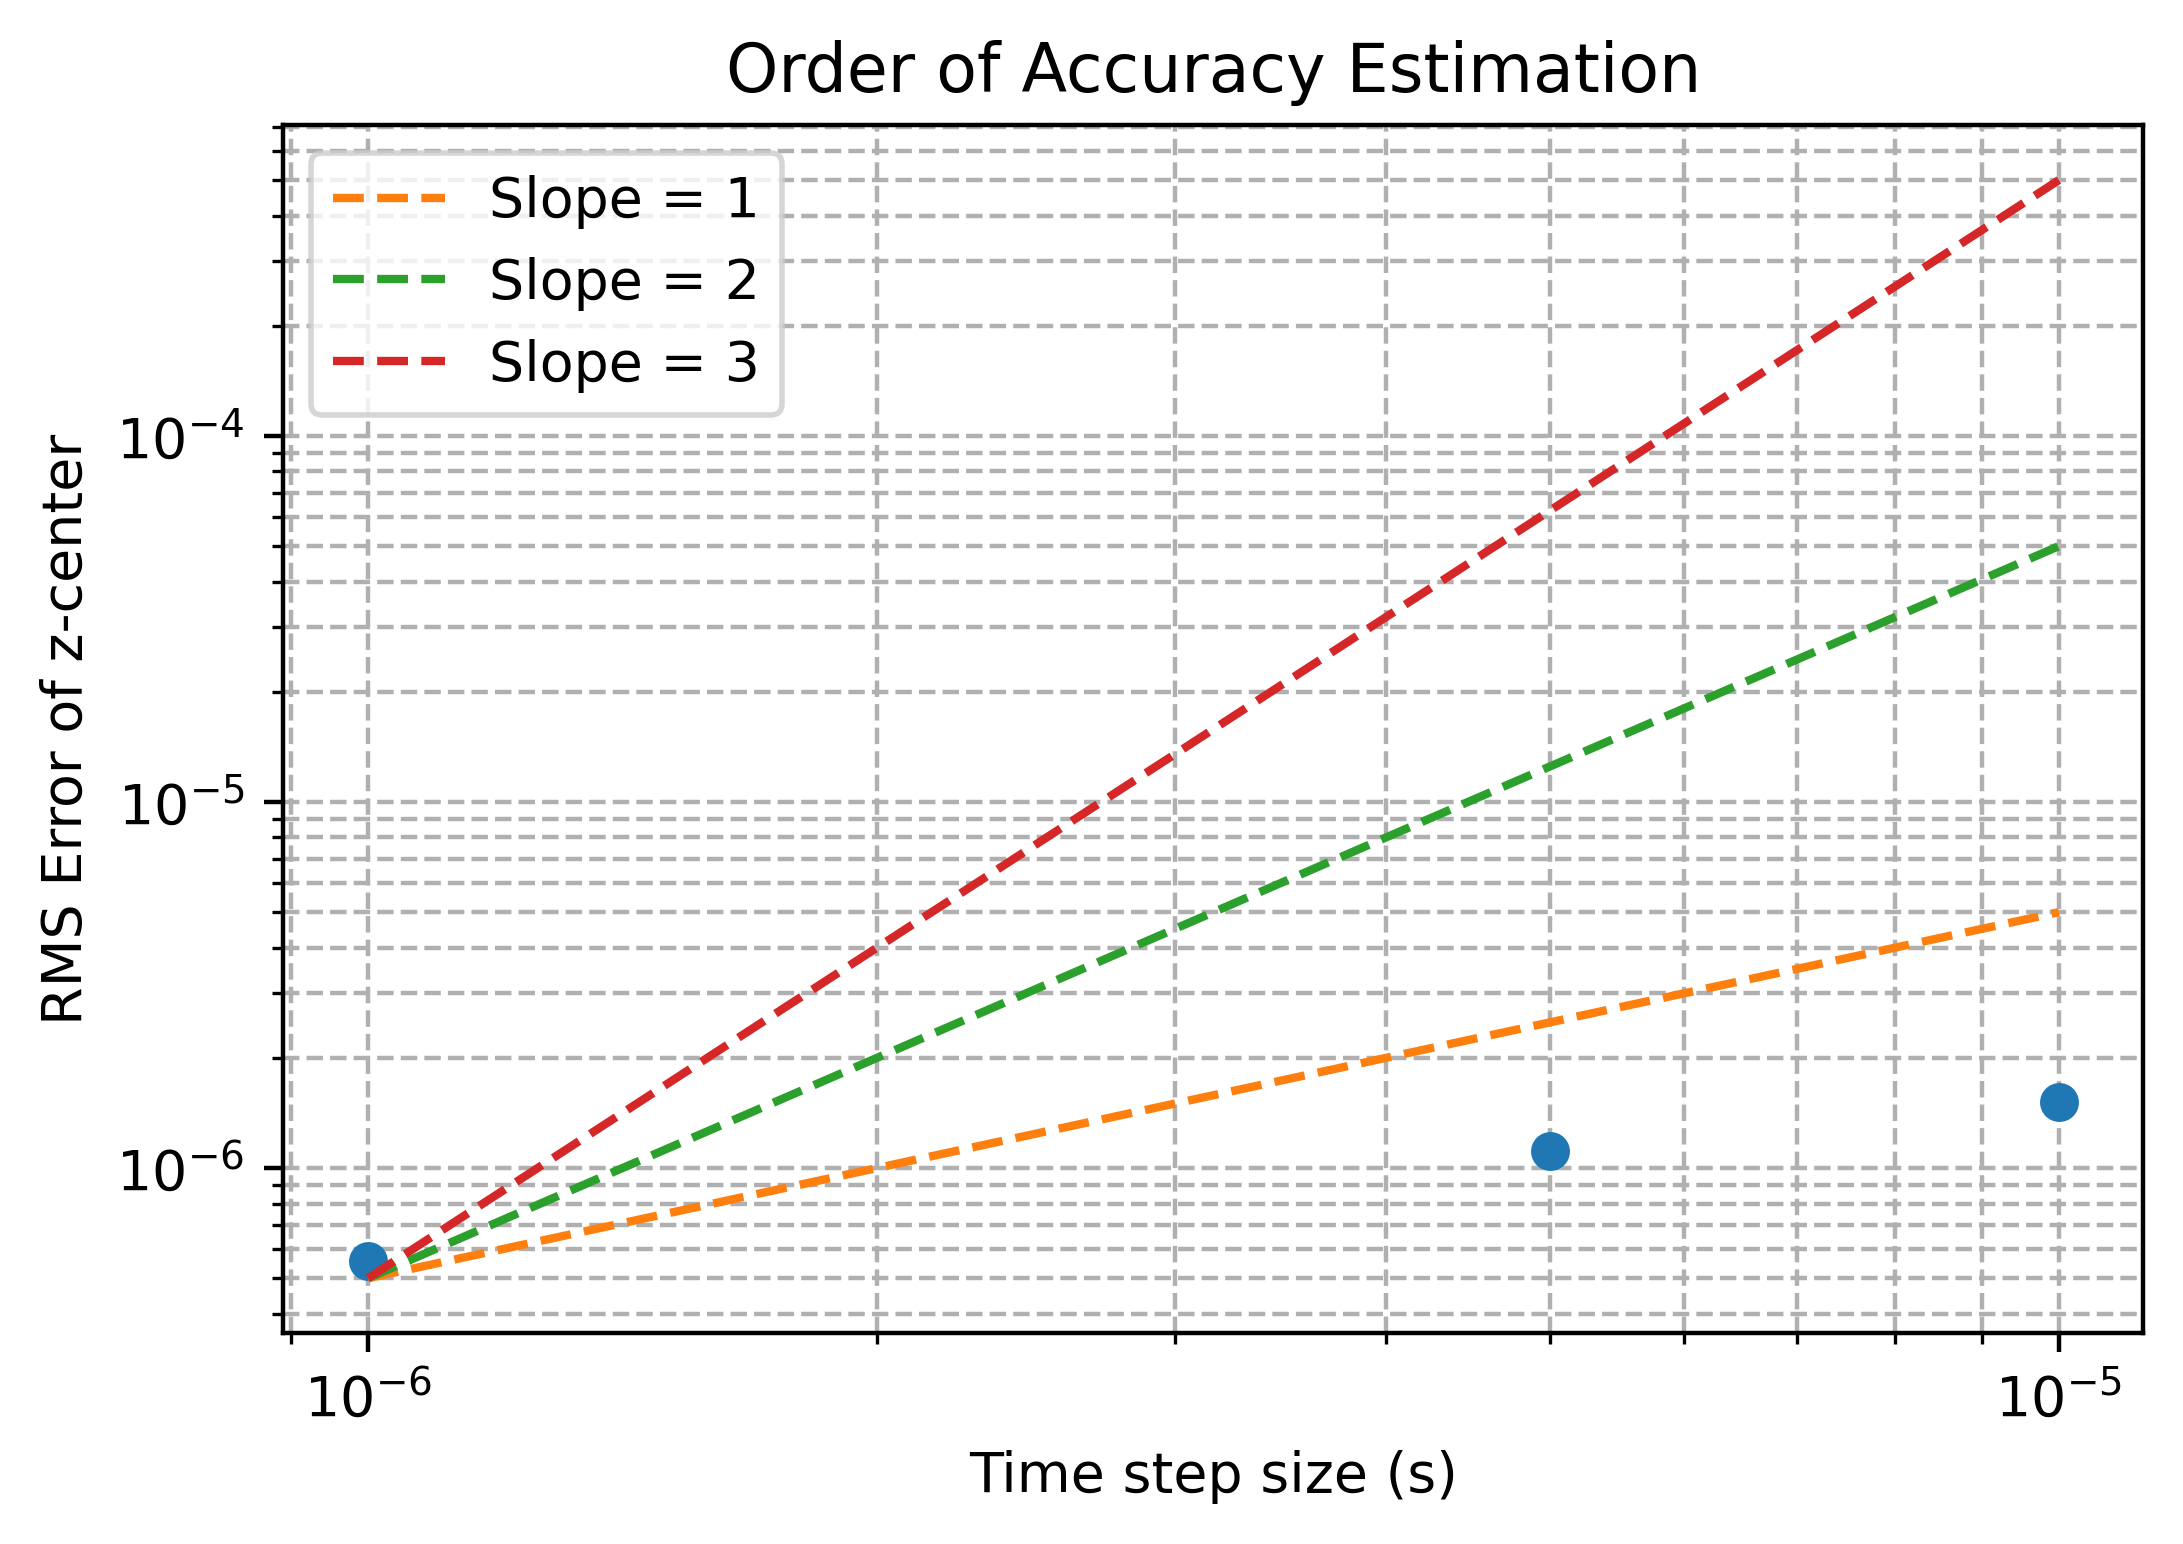

In [47]:
# Linear fit in log-log space
fitted_line1 = deltaT*0.5
fitted_line2 = np.power(deltaT,2)*5e5
fitted_line3 = np.power(deltaT,3)*5e11


# Plotting
plt.figure()
plt.loglog(deltaT1, RSM3, 'o')
plt.loglog(deltaT1, fitted_line1, '--', label=f'Slope = 1')
plt.loglog(deltaT1, fitted_line2, '--', label=f'Slope = 2')
plt.loglog(deltaT1, fitted_line3, '--', label=f'Slope = 3')
plt.xlabel("Time step size (s)")
plt.ylabel("RMS Error of z-center")
plt.title("Order of Accuracy Estimation")
plt.grid(True, which="both", ls='--')
plt.legend()
plt.show()

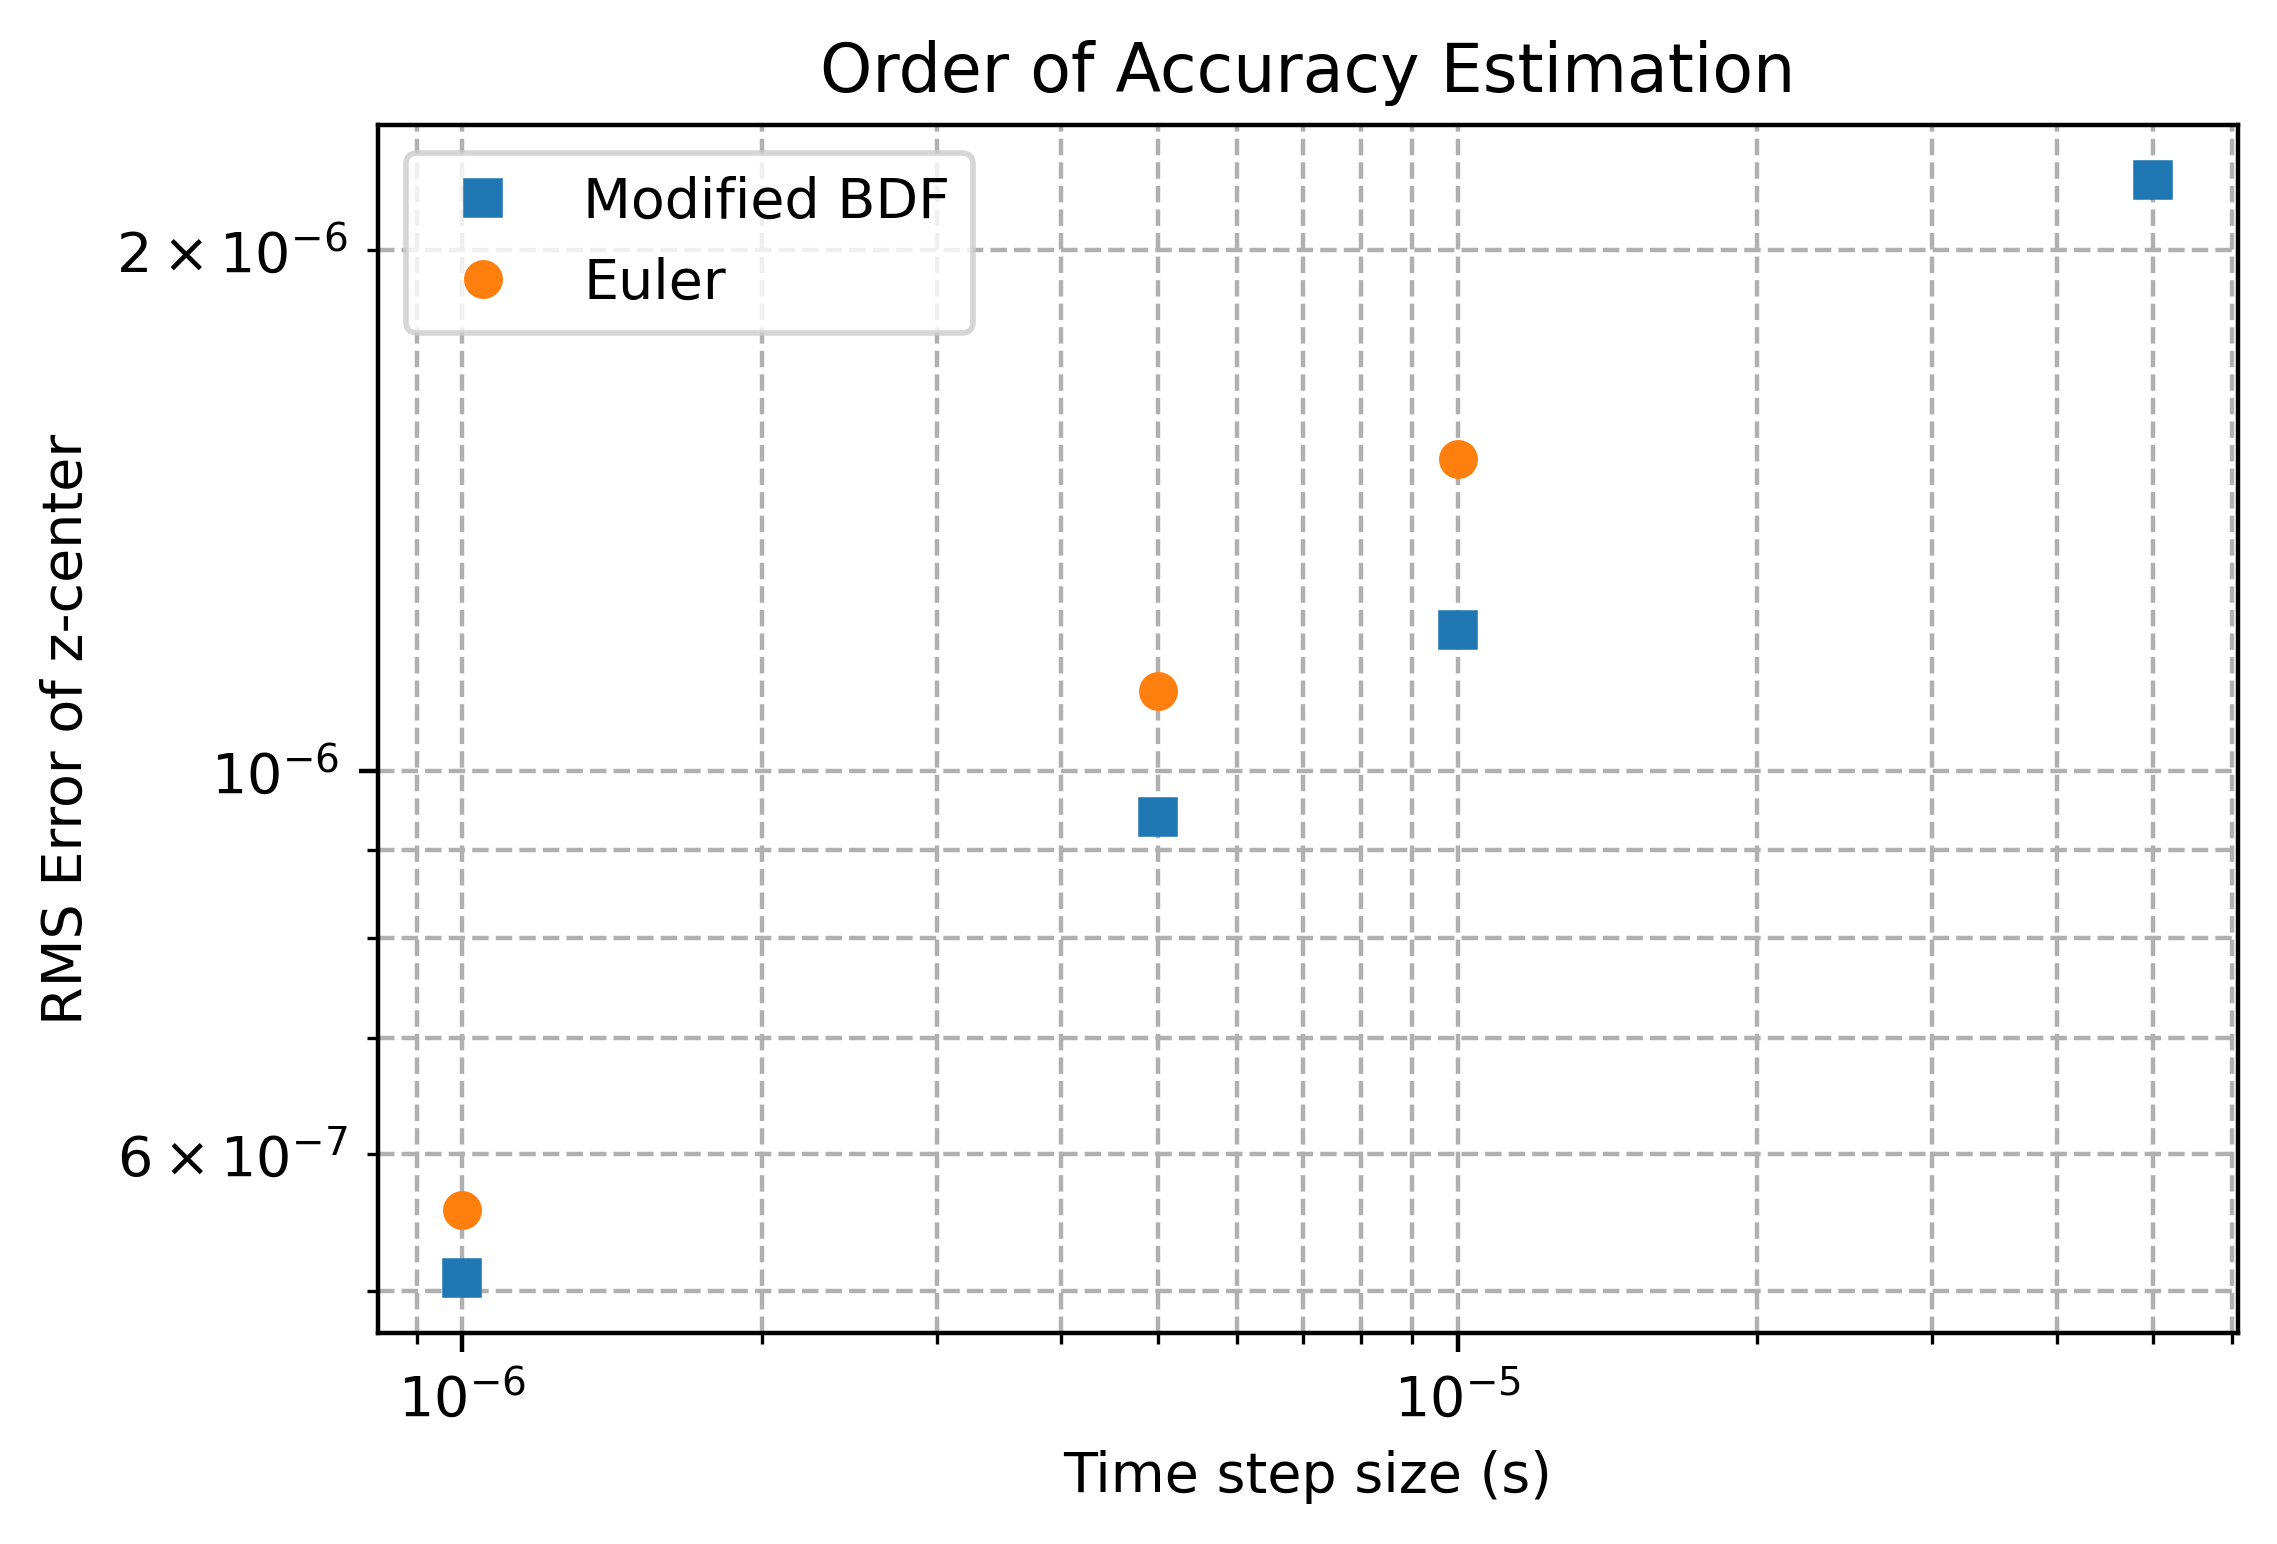

In [49]:
# Plotting
plt.figure()
plt.loglog(deltaT, RSM1, 's', label='Modified BDF')
plt.loglog(deltaT1, RSM3, 'o', label='Euler')

plt.xlabel("Time step size (s)")
plt.ylabel("RMS Error of z-center")
plt.title("Order of Accuracy Estimation")
plt.grid(True, which="both", ls='--')
plt.legend()
plt.show()

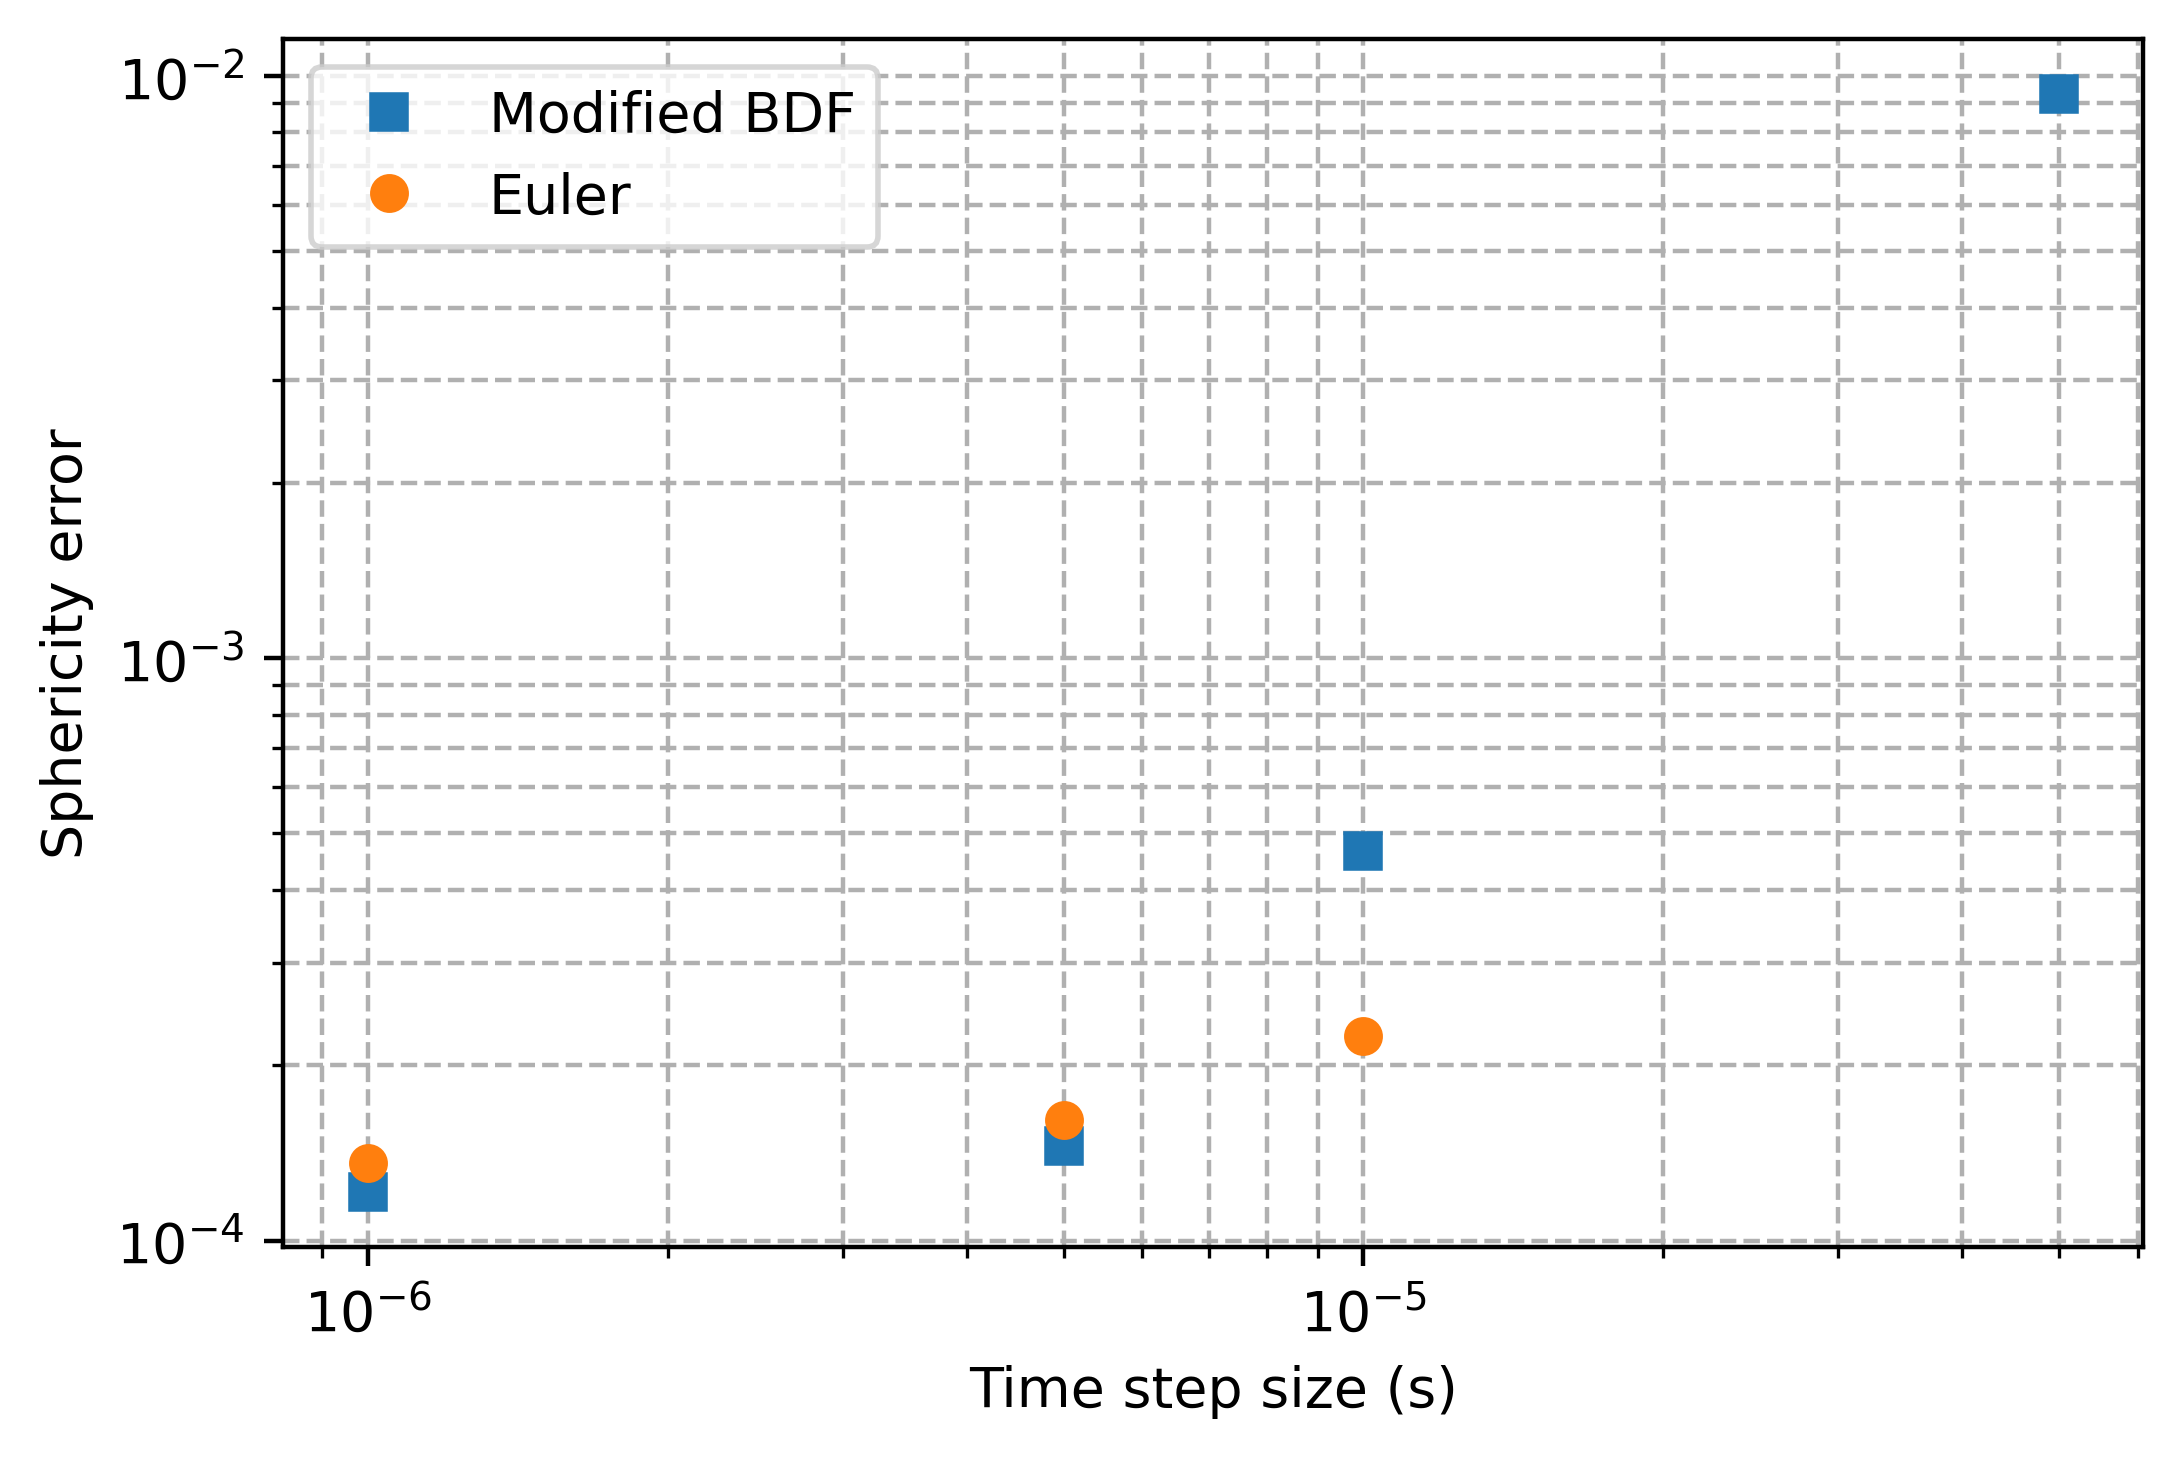

In [57]:
# Plotting
plt.figure()
plt.loglog(deltaT, SpheBDF, 's', label='Modified BDF')
plt.loglog(deltaT1, SpheEuler, 'o', label='Euler')

plt.xlabel("Time step size (s)")
plt.ylabel("Sphericity error")
#plt.title("Order of Accuracy Estimation")
plt.grid(True, which="both", ls='--')
plt.legend()
plt.show()

In [58]:
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.lines import Line2D


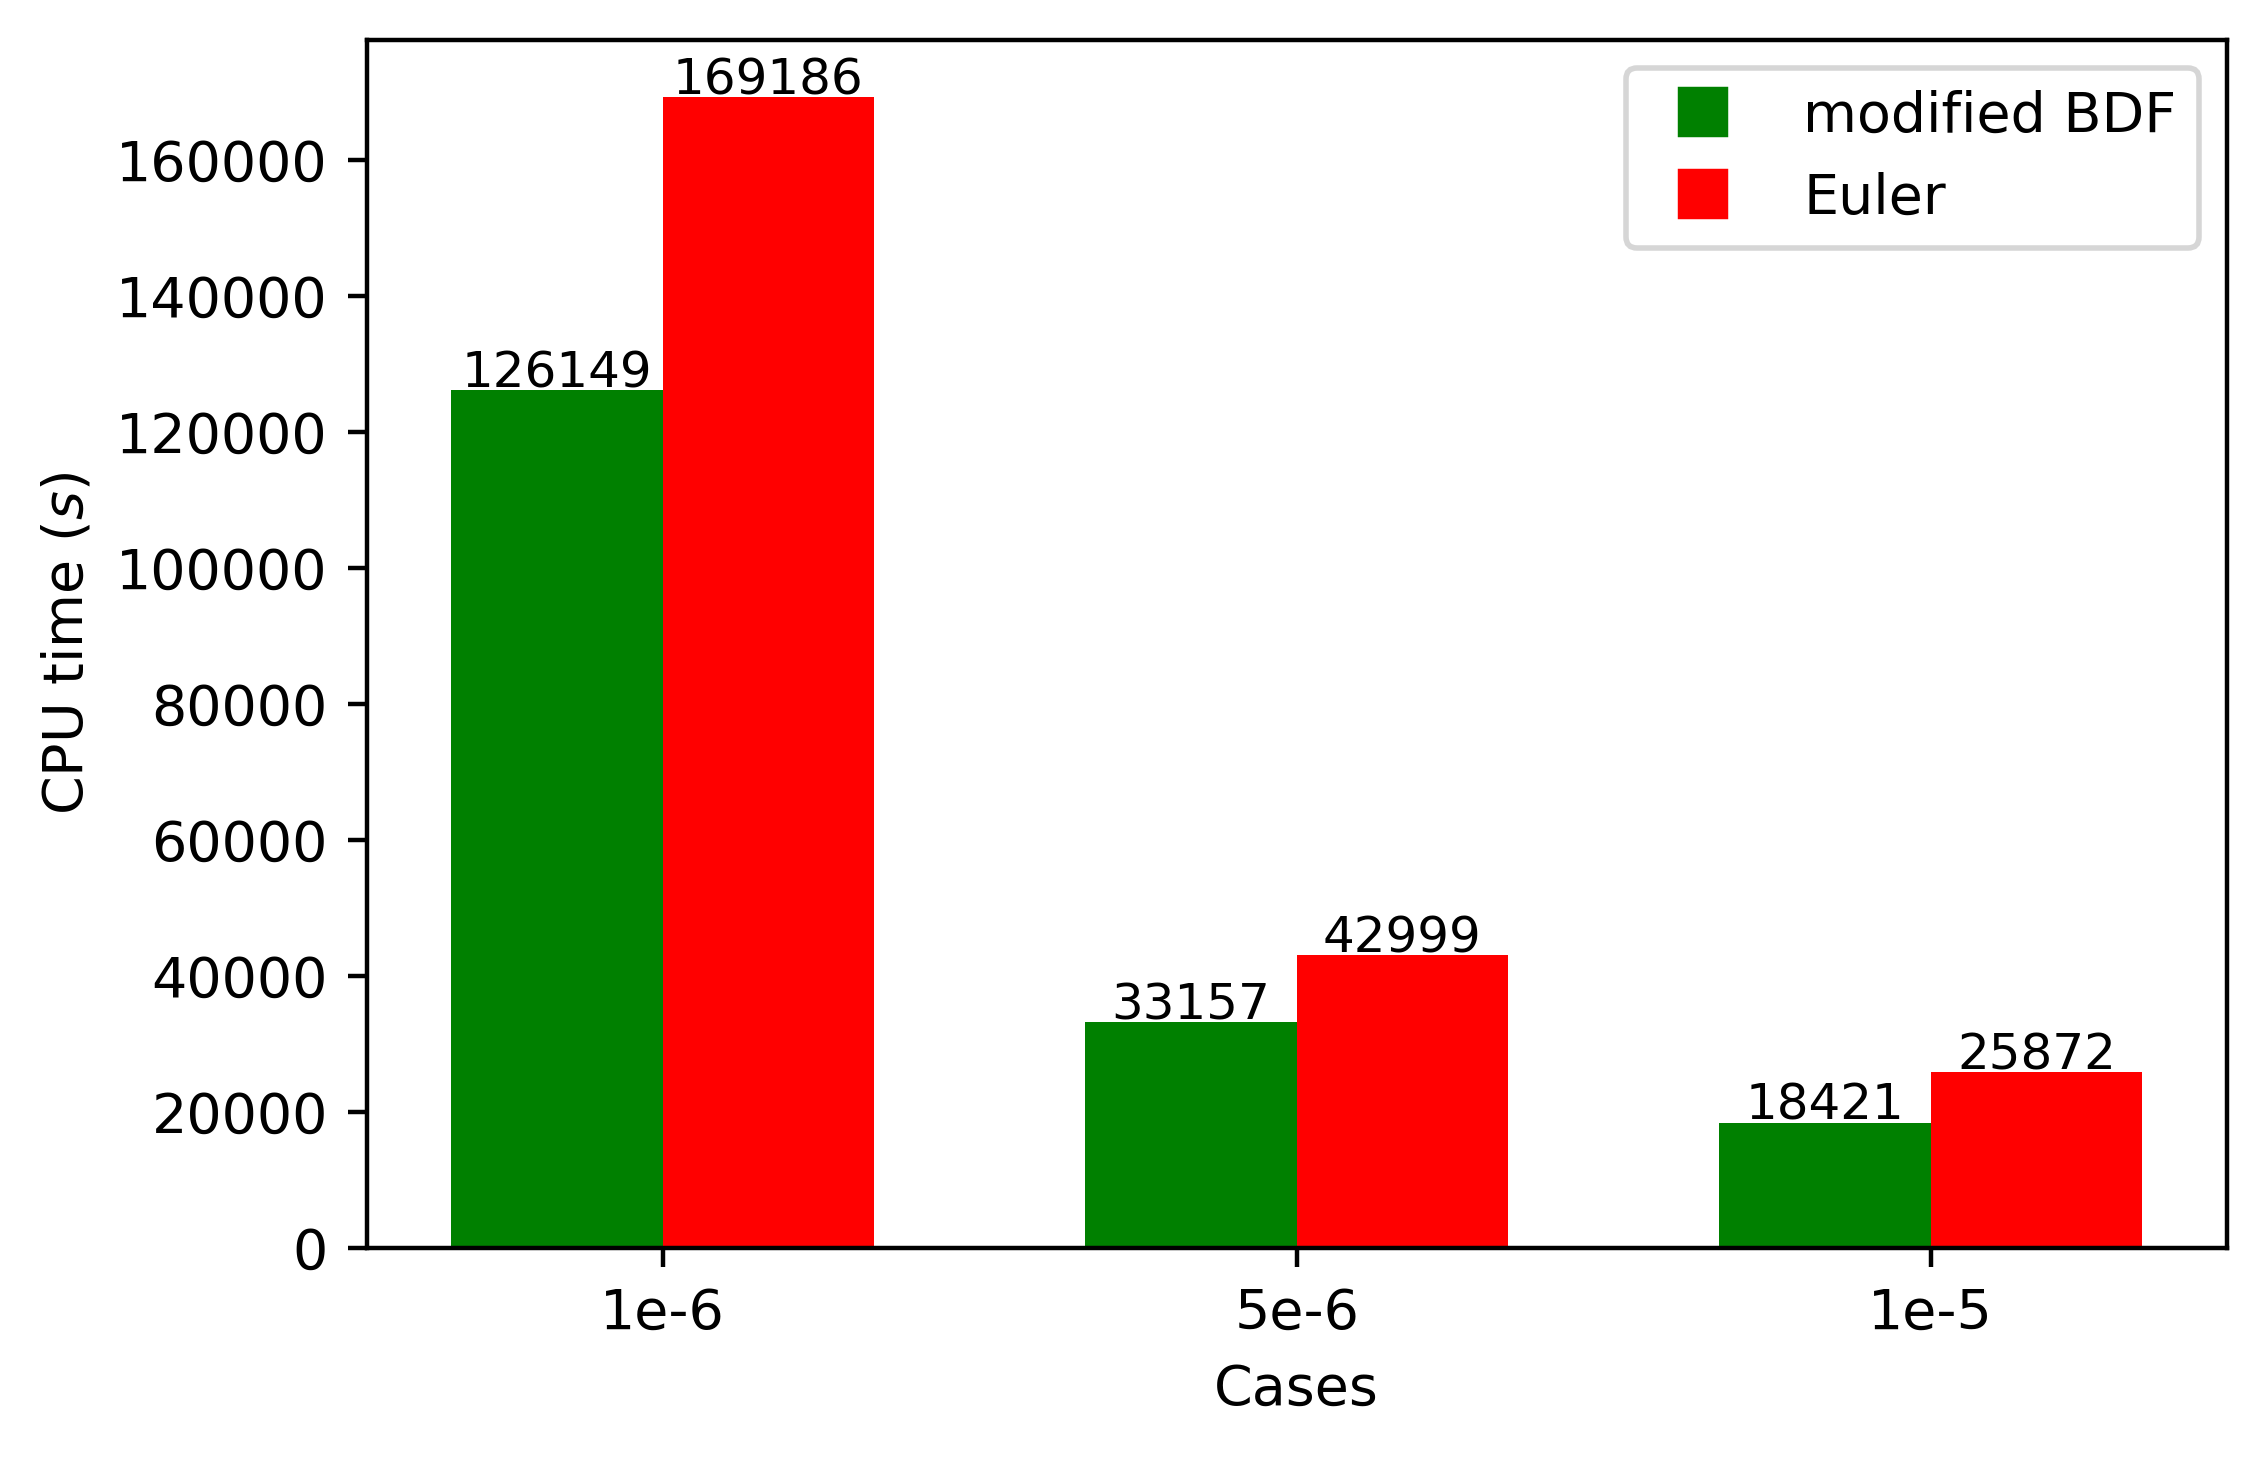

In [62]:

# Your five numbers
#data = [np.mean(dfPerturb_N30["times"]), np.mean(dfPerturb_N60["times"]), np.mean(dfPerturb_N90["times"]), 4, 8,40]
data = np.array([126149, 169186 , 33157, 42999,18421, 25872 ])

# Define bin edges and labels
#bin_edges = [0, 10, 20, 30, 40, 50, 60]
#bin_labels = ['N30', 'N60', 'N90', r'$N_{non}=1$', r'$N_{non}=2$',r'$N_{non}=10$']
#bin_edges = [0, 10, 20, 30]
labels = ['1e-6', '5e-6', '1e-5']

# Set the positions of the groups
group_positions = np.array([0, 1.5,3])

# Set the positions of the bars within each group
bar_width = 0.5
bar_positions = np.array([-0.25, 0.25])

# Specify colors for the first three and last three bars
#colors = ['green', 'green', 'green', 'red', 'red', 'red']
colors = np.array(['green', 'red','green', 'red', 'green', 'red'])
#texts = np.array([r'$N_{non}$=1', r'$N_{non}$=1', r'$N_{non}$=2', r'$N_{non}$=10',r'N_{non}=1', r'N_{non}=1', r'N_{non}=2', r'N_{non}=10',r'N_{non}=1', r'N_{non}=1', r'N_{non}=2', r'N_{non}=10'])
# Plotting the bar chart
for i, group_pos in enumerate(group_positions):
    plt.bar(bar_positions + group_pos, data[i*2:(i+1)*2], width=bar_width, color=colors[i*2:(i+1)*2],label=labels[i])
    #plt.text(bar_positions + group_pos, data[i*4:(i+1)*4] +500, texts[i*4:(i+1)*4], ha='center', va='center')
    for j in [0,1]:
        plt.text(bar_positions[j] + group_pos, data[i*2+j] + 2500, data[i*2+j], ha='center', va='center', fontsize=9)
    
# Annotate each bar with its value
#for i, value in enumerate(data):
    #plt.text(i, value + 1, data[i], ha='center', va='center')
    
    # Set x-axis ticks and labels
plt.xticks(group_positions, labels)

plt.ylabel(r"CPU time ($s$)")

#plt.ylim(0,16500)


blue_patch = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=10, label=r'modified BDF')
red_patch = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label=r'Euler')
plt.legend(handles=[blue_patch, red_patch])

plt.xlabel(r"Time step size")
plt.show()